In [1]:
import sys
sys.path.insert(0, '..')
from bowzer.utils import compare_model_performance

# Performance

## Tuning

In addition to Data Augmentation, there are several techniques I've tested to improve performance:

- Adding Dropout Layers
    - This helped the most with closing the gap between training and loss curves as well as improving overall accuracy.
- Increase Training Size
    - In most cases, training on more training data helps. I tested a few variations of Train/Val splits, increasing train size did help.
    - The implication of reducing the size of the validation set is that there is less data to evaluate on after each epoch. This can lead to less than ideal generalization of new images due to the model being overfit.
- Batch size
    - I tested 8, 16, 32, and 64. 32 seemed to be the sweet spot.

Without overcomplicating the goal of this project, I'm comfortable stopping here.

In a production setting, I'd want to see:
- A smaller gap between train/validation loss
    - The gap is mainly due to the validation sample size being smaller than ideal.
    - A wide gap between train/val loss can indicate that the validate set is not representative enough of the training data.
- Overall accuracy closer to 95%
    - Improving perfomance when just modeling 25 Breeds (just dogs) was easier than modeling 37 breeds.
    - In this case, in addition to the dataset size, multi classification it more complicated than binary-classification (just cat or dog).

Considering this, my final model is sufficient enough to achieve my goal.
- Small fluctuation at higher epochs but remains to be relatively stable.
    - For Candidates 1-3, training more than 50 Epochs -> Val loss starts to increase at a faster rate which indicates overfitting.
- Overall Accuracy is relatively stable.

## Additional techniques to explore further
- Early Stopping
- Learning Rate Scheduler
- Regularization
    - I tested adding L2 Regularization in addition to the dropout layer. This didn't show an immediate improvement on performance, but there is more to explore here if I wanted to invest more time into the project.
- Additional data transformations:
    - Increasing image resize: I tested larger than 128 and it was computationally expensive.
    - Auto Augmentation


Loading: ../model_store\trained_20241102\model_183311\model_epochs_50_performance.json
Loading: ../model_store\trained_20241103\model_101936\model_epochs_50_performance.json
Loading: ../model_store\trained_20241103\model_140950\model_epochs_50_performance.json
Loading: ../model_store\trained_20241103\model_153713\model_epochs_100_performance.json


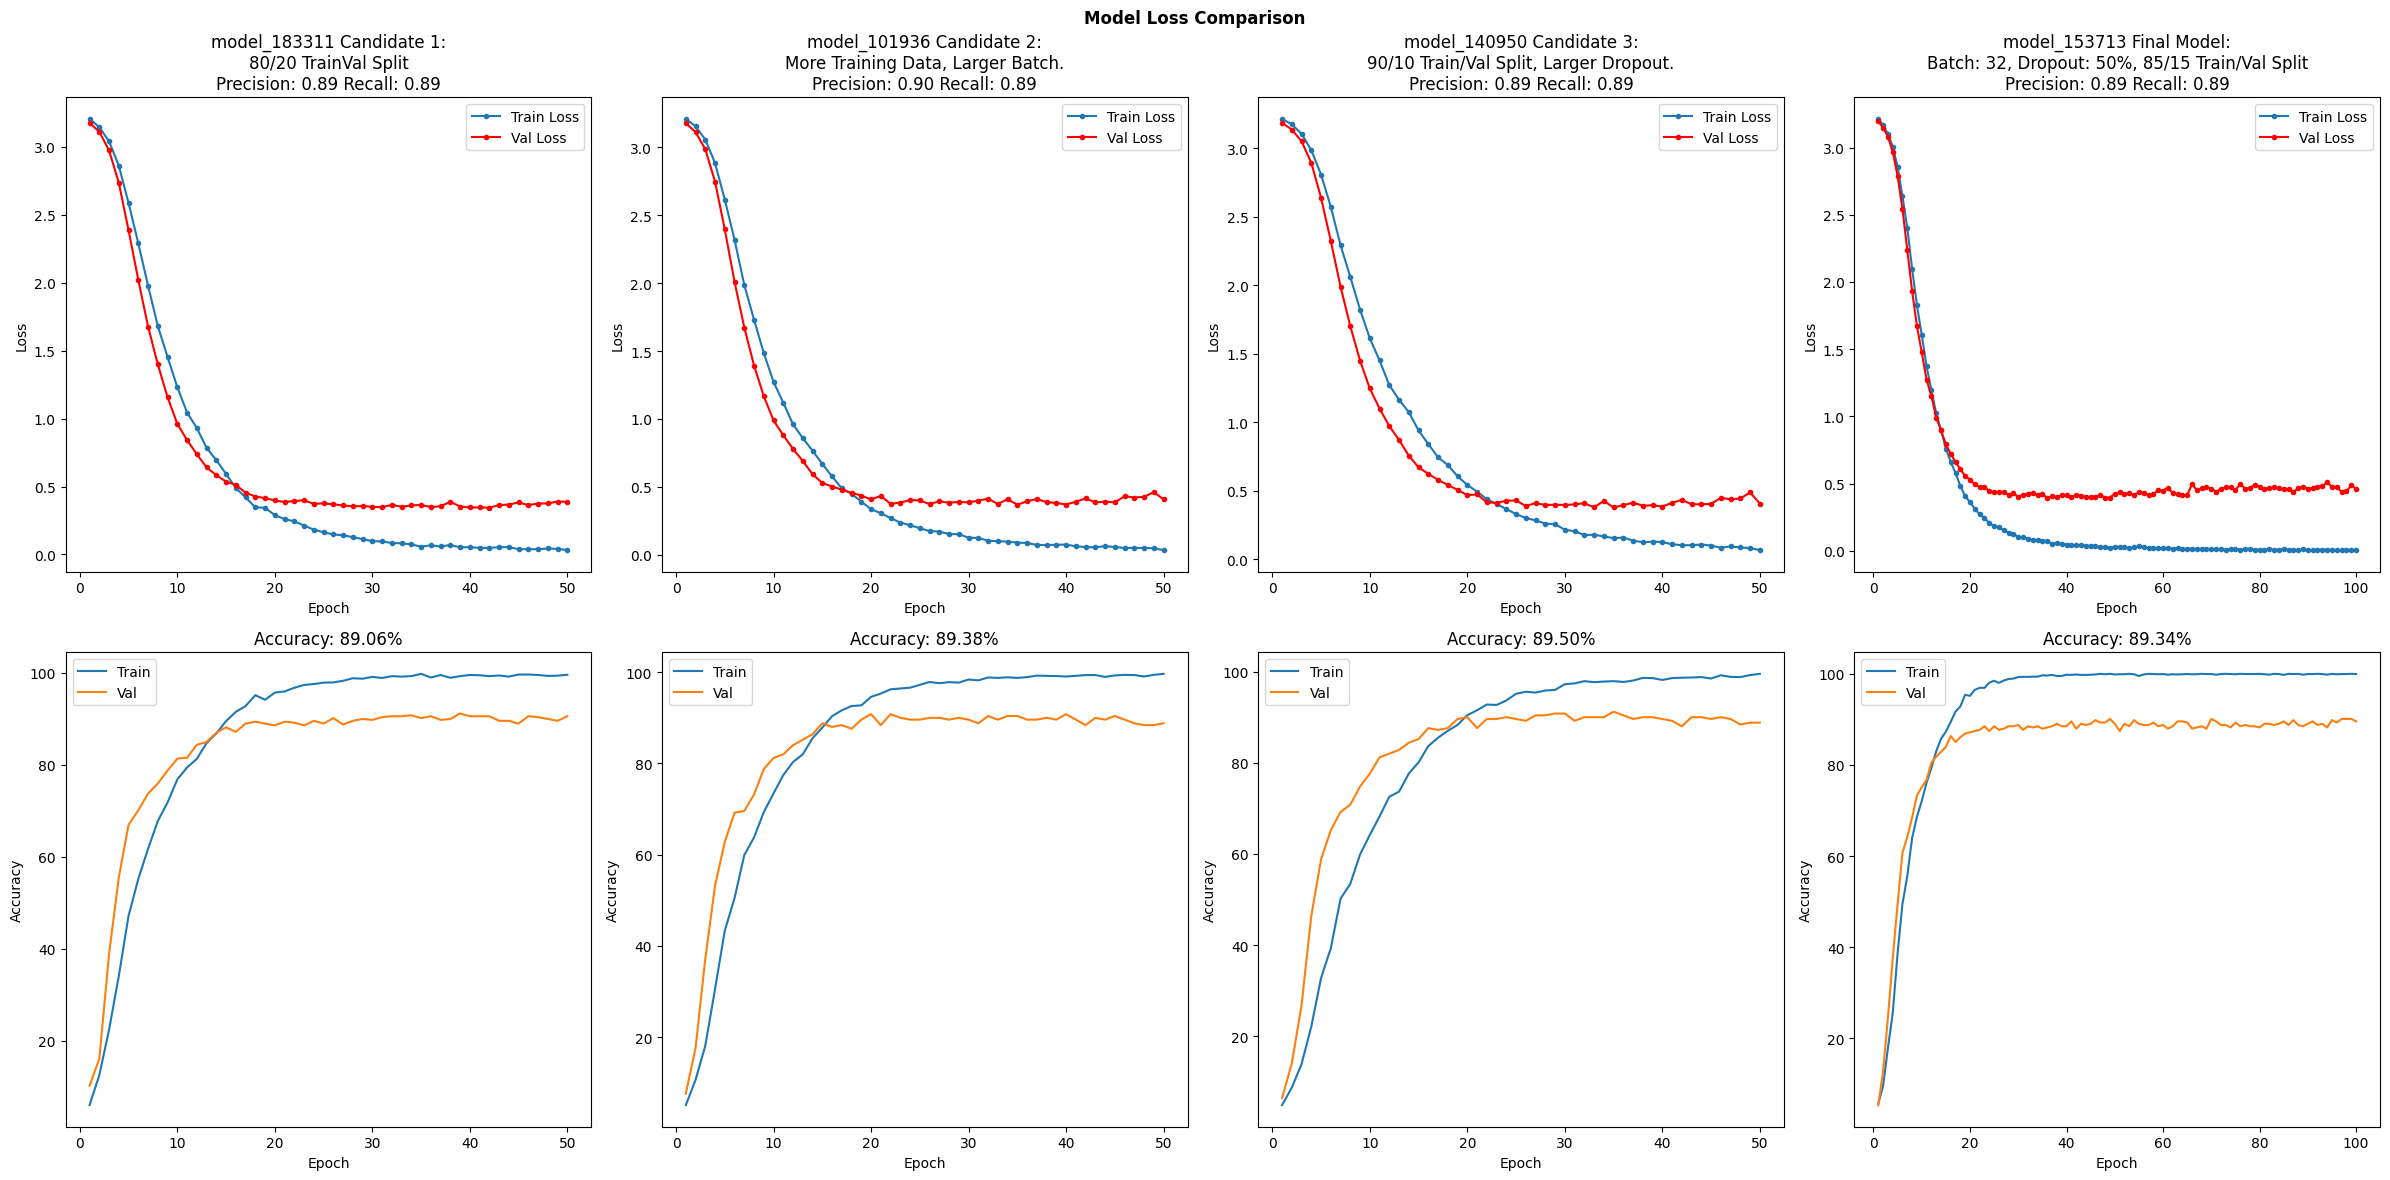

In [2]:
compare_models = {
    'model_183311':'Candidate 1:\n80/20 TrainVal Split', #100 Epochs, No Improvement
    'model_101936':'Candidate 2:\nMore Training Data, Larger Batch.', #100 Epochs, No Improvement
    'model_140950':'Candidate 3:\n90/10 Train/Val Split, Larger Dropout.', #100 Epochs, No Improvement
    'model_153713':'Final Model:\nBatch: 32, Dropout: 50%, 85/15 Train/Val Split',
    
}

compare_model_performance(
    [(model, compare_models[model]) for model in compare_models.keys()], share_yaxis=False
)

# Data Augmentation

This data includes 37 category (breeds), each breed contains about 200 images. Without Cat breeds, we're left with only 25 Dog Breeds.

Since I have a limited number of images to classify per breed, data augmentation has been useful in generating new datapoints for training.

## Impact on performance

In my trials, I've noticed:
- Preserving as many pixels as I can from the original image is helpful.
    - I didn't see improvement when applying RandomRotation, ElasticTransform (warping), and even RandomResizedCrop.
- Transforming pixel color is the most impactful.
    - RandomAutocontrast and RandomGrayscale was sufficient in making improvements without overcomplicating the transformations.


## Baseline Transformations

Below I show the performance of the Baseline model against adding different transformation combinations.

The Baseline transformations include:
- Resize
- RandomHorizontalFlip
- Normalization

Resize and Normalization help with standardizing the images.

Thinking about the images we're modeling, flipping horizontally makes more sense than flipping vertically. Vertical flipping tends to be more useful when the images are symmetrical across multiple axes (ex: flowers).

There are many other transformations that can be applied. However, I'm comfortable with ending at RandomAutocontrast and RandomGrayscale

Loading: model_store\trained_20241102\model_162511\model_epochs_50_performance.json
Loading: model_store\trained_20241102\model_165920\model_epochs_50_performance.json
Loading: model_store\trained_20241102\model_171711\model_epochs_50_performance.json
Loading: model_store\trained_20241102\model_172409\model_epochs_50_performance.json
Loading: model_store\trained_20241102\model_173253\model_epochs_50_performance.json
Loading: model_store\trained_20241102\model_175813\model_epochs_50_performance.json


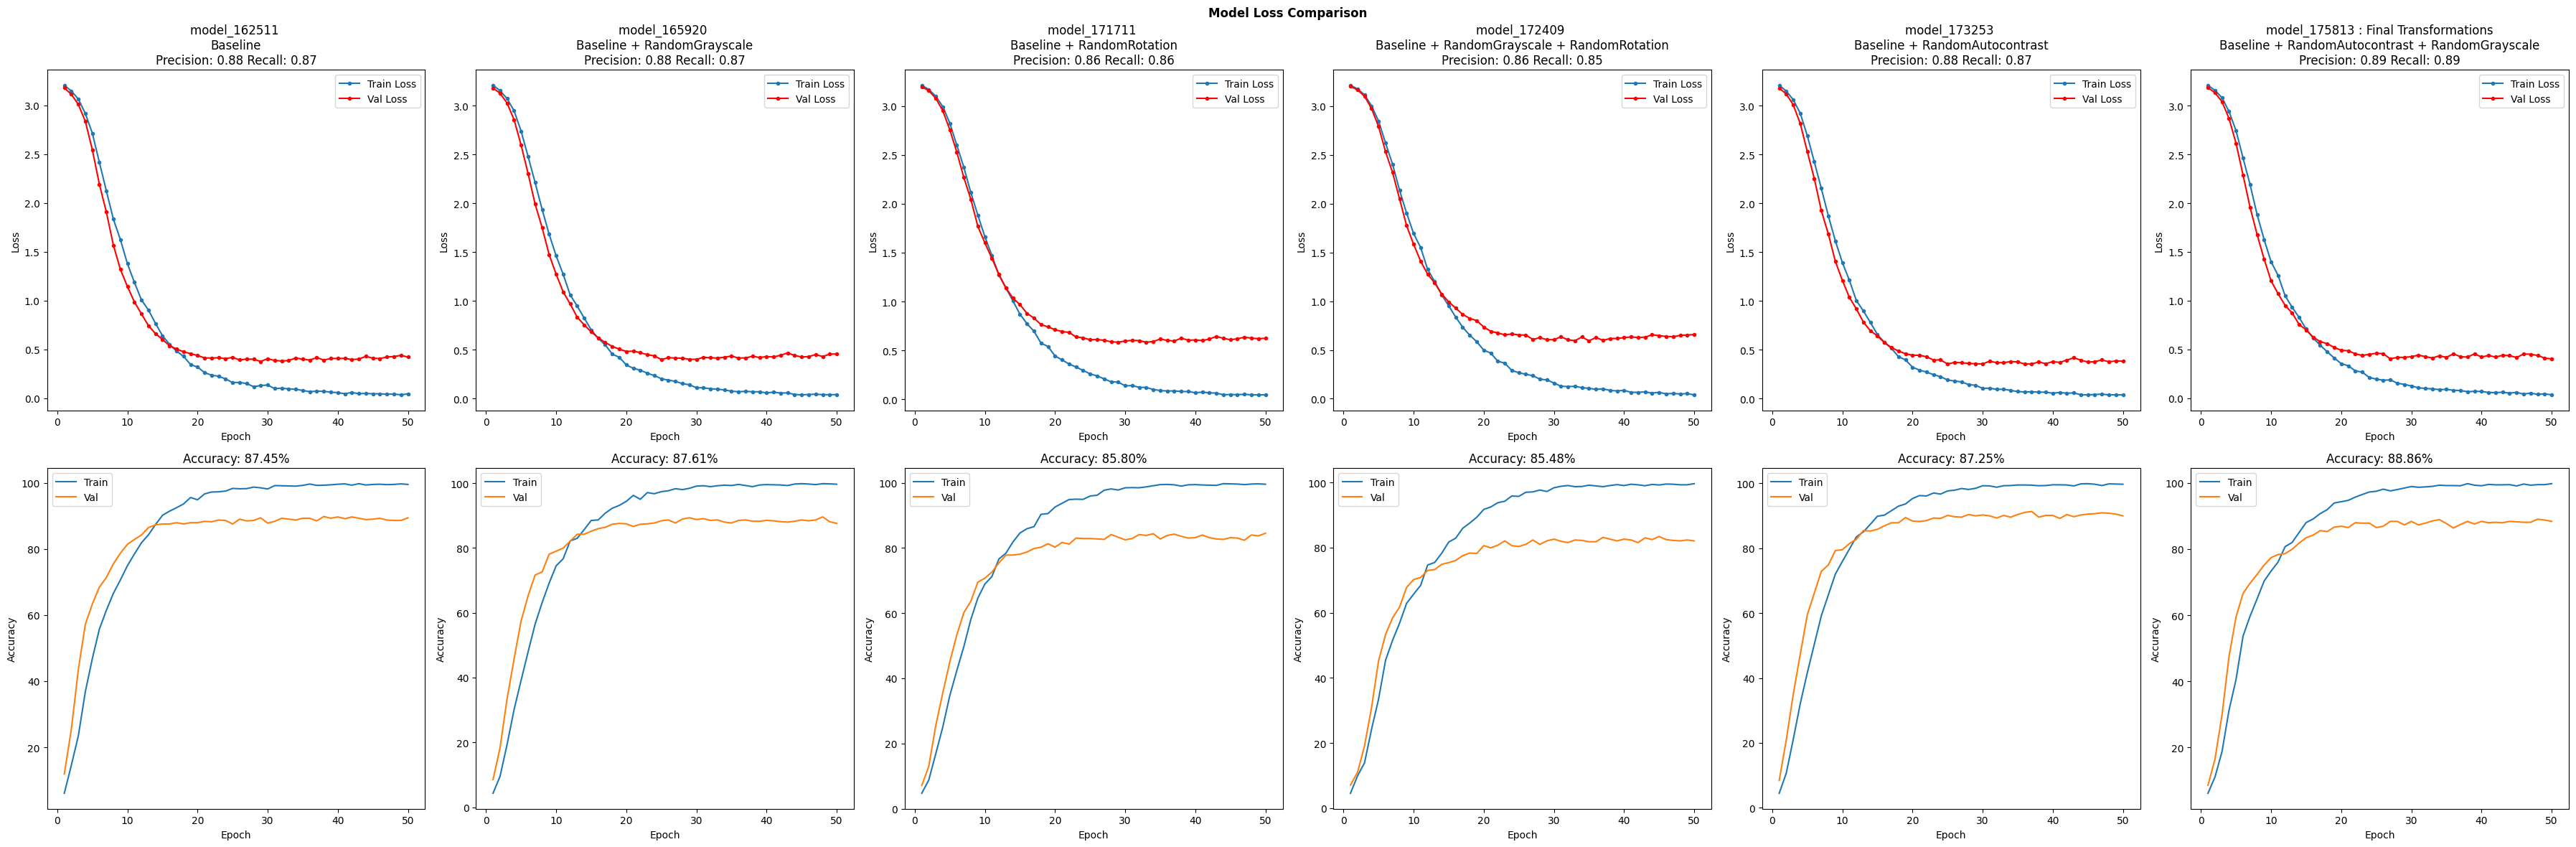

In [13]:
compare_models = {
    'model_162511':'\nBaseline',
    'model_165920':'\nBaseline + RandomGrayscale',
    'model_171711':'\nBaseline + RandomRotation',
    'model_172409':'\nBaseline + RandomGrayscale + RandomRotation',
    'model_173253':'\nBaseline + RandomAutocontrast',
    'model_175813':': Final Transformations\nBaseline + RandomAutocontrast + RandomGrayscale',
}

compare_model_performance(
    [(model, compare_models[model]) for model in compare_models.keys()], share_yaxis=False
)